**UE 4268 - Examen 2023**

**`KAMENI TCHEUFFA ELVIRA VANELLE`**, `19P2048` et `elvira.kameni@facsciences-uy1.cm` 

Department of Physics - Faculty of Science - University of Yaoundé I

`PMB`

`19 JUIN  2023`

In [1]:
from IPython.display import Image

# Algorithme de la VQE

**Cet exercice se traite exclusivement sur la feuille de composition**

L'algorithme du VQE (Variationnal Quantum Eigensolver) se résume en deux grandes parties qu'illustre la figure ci-dessous.
 
1. Expliquer pourquoi on dit que c'est un **algorithme hybride** en indiquant ce que fait chaque processeur. 
2. Qu'est-ce que la profondeur d'un circuit quantique et quelle son influence dans les algorithmes du VQE?

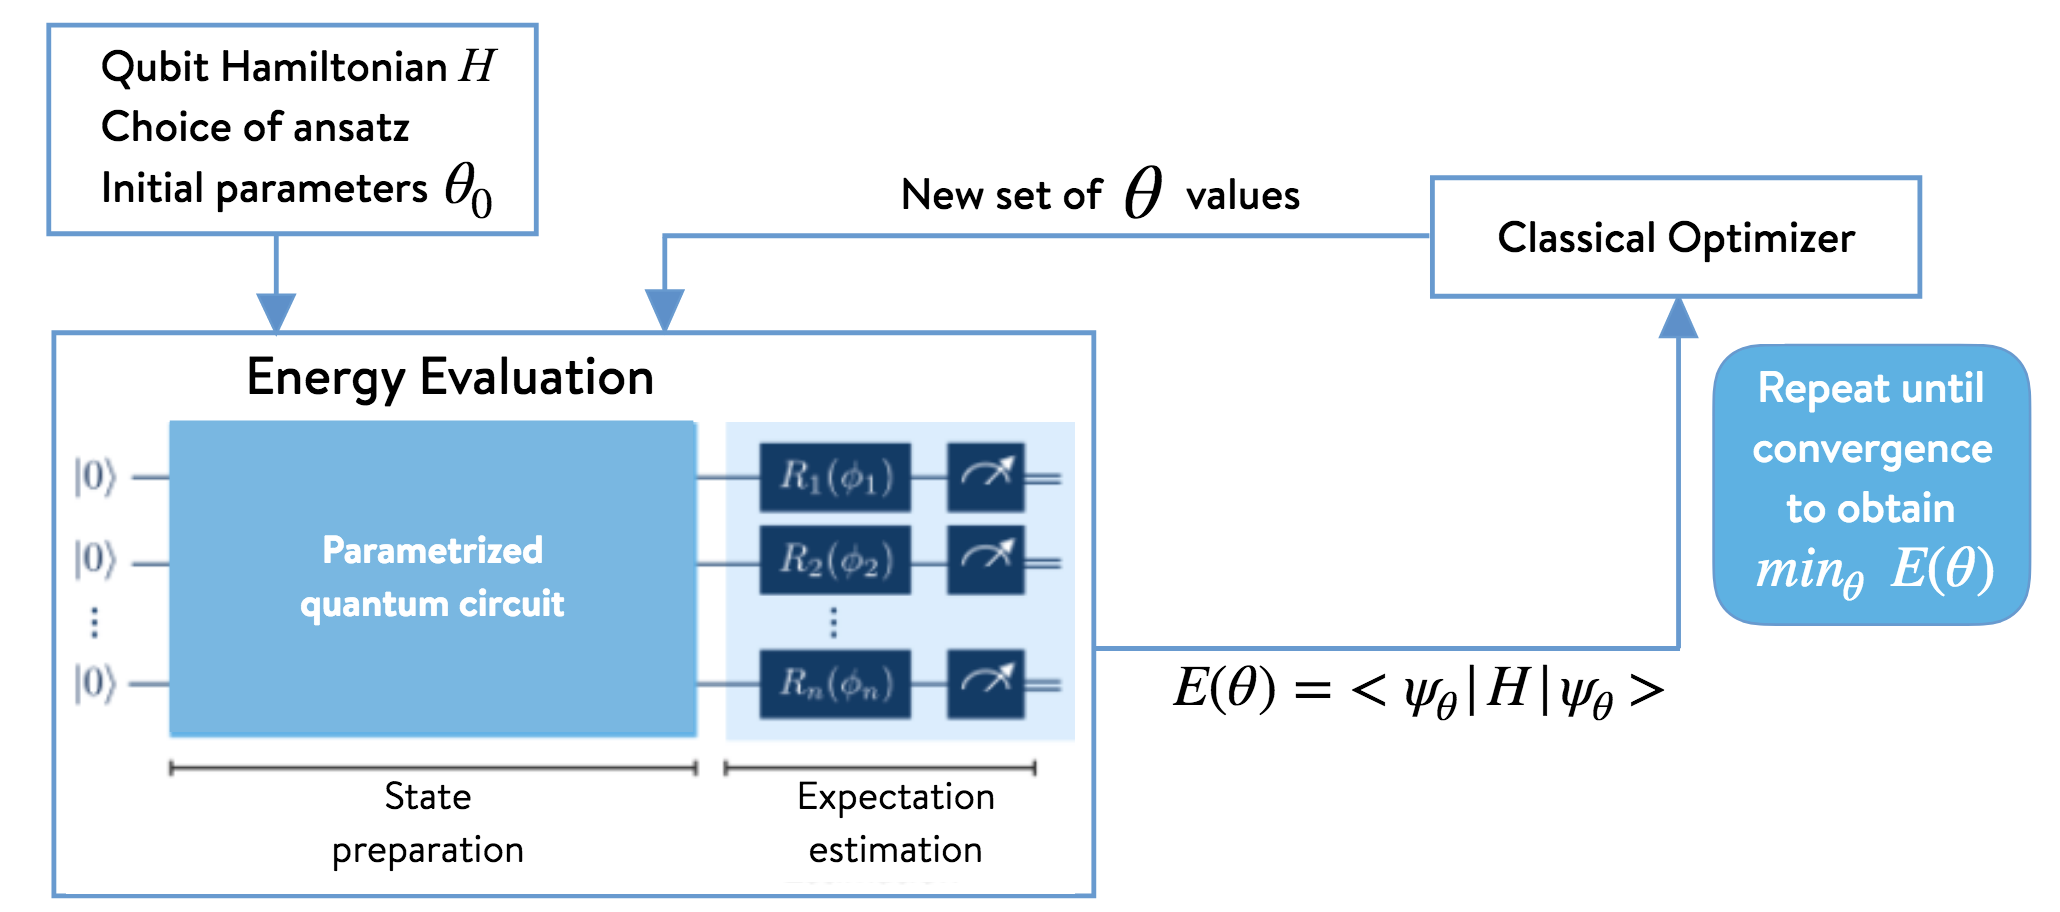

In [2]:
Image("./VQE_Diagram.png", width=600)

# Support Vector Regression to predict polarity of molecules

Write a python script that use a **support vector regression (SVR)** model to predict **TPSA** (**Topological polar surface area**, a physicochemical property describing the polarity of molecules) from molecules of the ZING Dataset contained in the file `'.Zn10.txt'`. The input - structural feature of molecules is Morgan fingerprint and the output is TPSA.

We recall that the **molecular fingerprint** represents the substructures of a molecule (array) as a vector of binary numbers. It is a molecular structure descriptor to use as input to reveal the relationship between molecular structure and properties, called **Quantitative Structure-Activity Relationships (QSAR)**.

The workflow is

1. Get molecular fingerprints of each molecule
2. Split the dataset to training set and test set
3. Train a SVR model
4. Check the accuracy of prediction with $R²$ and mean-square error
5. Visualize the results from the model.

**The various necessaries libraries and modules will be import only where they are needed**.


In [2]:
import sklearn
print(sklearn.__version__)

1.0.2


In [3]:
import rdkit
print(rdkit.__version__)

2022.09.5


#### Get molecular fingerprints of each molecules

In [16]:
import pandas as pd 
import os
PATH = os.getcwd()
data_path = os.path.join(PATH, 'Zn10.txt')

In [17]:
with open(data_path, 'r') as f: 
    content = f.readlines()
    smile = [smi.split()[0] for smi in content]
    
df = pd.DataFrame(data=smile, columns=['Smiles'])
df

Smiles
0             NC(=O)C1CCCCC1C(F)(F)F
1               CCCCCNC(=O)N1CCCC1CO
2            CCC(CC)c1cc(C[NH3+])on1
3         C[NH2+]C1CCC(c2ccccc2Cl)C1
4     COc1ccc2c(c1)C(C(C)[NH3+])CN2C
...                              ...
5995    COCC(C)NS(=O)(=O)c1cccc(N)c1
5996   COc1ccc(C(C[NH3+])C2CC2)cc1OC
5997         CCCC[NH2+]C1CCc2ccccc21
5998  CC1CCCC([NH2+]Cc2cccc(O)c2)C1C
5999        CCC(C)NC(=O)NCCC(=O)[O-]

[6000 rows x 1 columns]

#### Convert the smiles in molecules

In [18]:
from rdkit.Chem import AllChem,PandasTools,Descriptors

Smiles  \
0             NC(=O)C1CCCCC1C(F)(F)F   
1               CCCCCNC(=O)N1CCCC1CO   
2            CCC(CC)c1cc(C[NH3+])on1   
3         C[NH2+]C1CCC(c2ccccc2Cl)C1   
4     COc1ccc2c(c1)C(C(C)[NH3+])CN2C   
...                              ...   
5995    COCC(C)NS(=O)(=O)c1cccc(N)c1   
5996   COc1ccc(C(C[NH3+])C2CC2)cc1OC   
5997         CCCC[NH2+]C1CCc2ccccc21   
5998  CC1CCCC([NH2+]Cc2cccc(O)c2)C1C   
5999        CCC(C)NC(=O)NCCC(=O)[O-]   

                                             Molecules  
0     <rdkit.Chem.rdchem.Mol object at 0x7f8ea3673f90>  
1     <rdkit.Chem.rdchem.Mol object at 0x7f8ea36733c0>  
2     <rdkit.Chem.rdchem.Mol object at 0x7f8ea3673e40>  
3     <rdkit.Chem.rdchem.Mol object at 0x7f8ea35160b0>  
4     <rdkit.Chem.rdchem.Mol object at 0x7f8ea3516120>  
...                                                ...  
5995  <rdkit.Chem.rdchem.Mol object at 0x7f8ea34c9740>  
5996  <rdkit.Chem.rdchem.Mol object at 0x7f8ea34c97b0>  
5997  <rdkit.Chem.rdchem.Mol object at 0x7f8ea34c9820>  
5998  <rdkit.Chem.rdchem.Mol object at 0x7f8ea34c9890>  
5999  <rdkit.Chem.rdchem.Mol object at 0x7f8ea34c9900>  

[6000 rows x 2 columns]
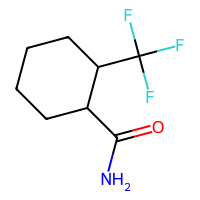
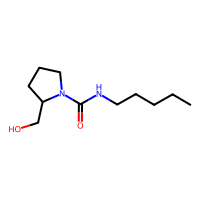
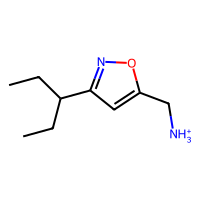
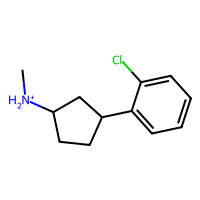
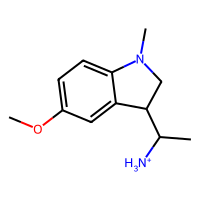
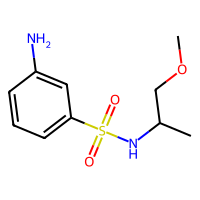
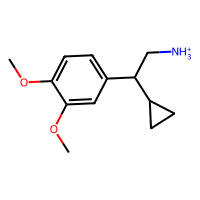
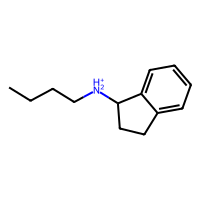
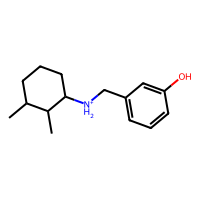
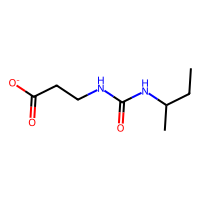

In [19]:
PandasTools.AddMoleculeColumnToFrame(frame=df, smilesCol='Smiles', molCol='Molecules')
df

#### Check if thems is rows where RDKIT talled to generate molecules from SMILES

In [20]:
df.isnull().sum()

Smiles       0
Molecules    0
dtype: int64

In [21]:
from rdkit.Chem import QED

molecule = df.iloc[:, 1].values
descriptors = [QED.qed(mol)for mol in molecule]

In [23]:
descriptors_df = pd.DataFrame(descriptors, columns=['QED'])
data = pd.concat([df, descriptors_df], axis=1) 
data

Smiles  \
0             NC(=O)C1CCCCC1C(F)(F)F   
1               CCCCCNC(=O)N1CCCC1CO   
2            CCC(CC)c1cc(C[NH3+])on1   
3         C[NH2+]C1CCC(c2ccccc2Cl)C1   
4     COc1ccc2c(c1)C(C(C)[NH3+])CN2C   
...                              ...   
5995    COCC(C)NS(=O)(=O)c1cccc(N)c1   
5996   COc1ccc(C(C[NH3+])C2CC2)cc1OC   
5997         CCCC[NH2+]C1CCc2ccccc21   
5998  CC1CCCC([NH2+]Cc2cccc(O)c2)C1C   
5999        CCC(C)NC(=O)NCCC(=O)[O-]   

                                             Molecules       QED  
0     <rdkit.Chem.rdchem.Mol object at 0x7f8ea3673f90>  0.681153  
1     <rdkit.Chem.rdchem.Mol object at 0x7f8ea36733c0>  0.678579  
2     <rdkit.Chem.rdchem.Mol object at 0x7f8ea3673e40>  0.738657  
3     <rdkit.Chem.rdchem.Mol object at 0x7f8ea35160b0>  0.770859  
4     <rdkit.Chem.rdchem.Mol object at 0x7f8ea3516120>  0.781030  
...                                                ...       ...  
5995  <rdkit.Chem.rdchem.Mol object at 0x7f8ea34c9740>  0.742397  
5996  <rdkit.Chem.rdchem.Mol object at 0x7f8ea34c97b0>  0.819062  
5997  <rdkit.Chem.rdchem.Mol object at 0x7f8ea34c9820>  0.699701  
5998  <rdkit.Chem.rdchem.Mol object at 0x7f8ea34c9890>  0.826891  
5999  <rdkit.Chem.rdchem.Mol object at 0x7f8ea34c9900>  0.592315  

[6000 rows x 3 columns]

#### Nous refaisons encore le check

In [24]:
df.isnull().sum()

Smiles       0
Molecules    0
dtype: int64

In [25]:
import numpy as np

In [26]:
from rdkit import Chem, DataStructs

In [27]:
fps = []
for mol in molecule:
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024)
    fp_arr = np.zeros((1,)) # une ligne
    DataStructs.ConvertToNumpyArray(fp, fp_arr)
    fps.append(fp)

In [28]:
fps = np.asarray(fps)
fps

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [29]:
fps.shape

(6000, 1024)

#### SplittinG the dataset

In [30]:
import matplotlib.pyplot as plt
import os

In [32]:
logp = data.iloc[:,2].values

In [33]:
from sklearn.model_selection import train_test_split

seed = np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(fps, logp, train_size=0.8, random_state=seed)

#### Train of model

In [34]:
from sklearn.svm import SVR

svr = SVR()
_ = svr.fit(X_train, y_train)

In [35]:
from sklearn.metrics import mean_squared_error, r2_score

logp_predict = svr.predict(X_test)
r2 = r2_score(y_test, logp_predict)
mse = mean_squared_error(y_test, logp_predict)

print(f'The r2_score is {r2} and the mean square error is {mse}')

The r2_score is 0.5305745883047662 and the mean square error is 0.00512430479205094


#### Visualization of the model

In [36]:
from scipy import stats

vect_norm, intercept, r_value, p_value, std_error = stats.linregress(y_test, logp_predict)
fx = vect_norm * y_test + intercept

plt.scatter(y_test, logp_predict, color='green', s=2)
plt.plot(y_test, fx, label='Predicted logP ='+str(round(vect_norm,2))+'*True logP +'+str(round(intercept,2)), linewidth=2)
plt.xlabel('True logP')
plt.ylabel('Predicted logP')
plt.legend()
plt.show()

# Calculer l'état fondamental de la molécule de phenylsulfonyl-carbazole (PSPCz)

Les calculateurs quantiques pourraient être des outils inestimables pour étudier la structure électronique et les propriétés dynamiques de molécules et de matériaux complexes, car il est plus logique de modéliser des systèmes de la physique quantique sur un dispositif quantique que sur un calculateur classique. Le phenylsulfonyl-carbazole (PSPCz) dont la formule moléculaire est $C_{18}H_{13}NO_2S$ et son SMILES isomérique est C1=CC=C(C=C1)S(=O)(=O)C2=CC=CC3=C2NC4=CC=CC=C34, a des propriétés émettrices utiles de fluorescence retardée activée thermiquement (TADF) pour les applications de diodes électroluminescentes organiques (OLED). Son Hamiltonien en représentation de Pauli $\{\mathtt{I,\,X,\,Y,\,Z}\}$ est

$$ \mathtt{H} = h_1(\mathtt{I}\otimes\mathtt{I}) + h_2(\mathtt{Z}\otimes\mathtt{I} - \mathtt{I}\otimes\mathtt{Z}) + h_3(\mathtt{Z}\otimes\mathtt{Z}) + h_4(\mathtt{x}\otimes\mathtt{X}) + h_5(\mathtt{X}\otimes\mathtt{I} + \mathtt{I}\otimes\mathtt{X} + \mathtt{X}\otimes\mathtt{Z} - \mathtt{Z}\otimes\mathtt{X}),$$

où les coefficients 
$$h_1 = -0.518418,\, h_2 = -0.136555,\, h_3 = -0.025866,\, h_4 = 0.015725,\, h_5 = -0.000296.$$

1. Utiliser `rdkit.Chem` pour représenter en 2D de molécule PSPCz à partir de son SMILES.

In [39]:
from rdkit import Chem, DataStructs

In [40]:
smi = 'C1=CC=C(C=C1)S(=O)(=O)C2=CC=CC3=C2NC4=CC=CC=C34'
m = Chem.MolFromSmiles(smi) # Convert smiles to molecule
m

2. Utiliser, pour calculer l'état fondamental de la molécule PSPCz,
   * `qiskit.opflow.operator_globals` et 
   * `qiskit.algorithms.minimum_eigensolvers.NumPyMinimumEigensolver`.

In [90]:
from qiskit.opflow import operator_globals
from qiskit.algorithms.minimum_eigensolvers import NumPyMinimumEigensolver

# VQE avec un Hardware Efficient Ansatz (HEA)

1. Utiliser  `qiskit.circuit.library.EfficientSU2` pour reproduire le Hardware Efficient Ansatz (HEA) suivant : 

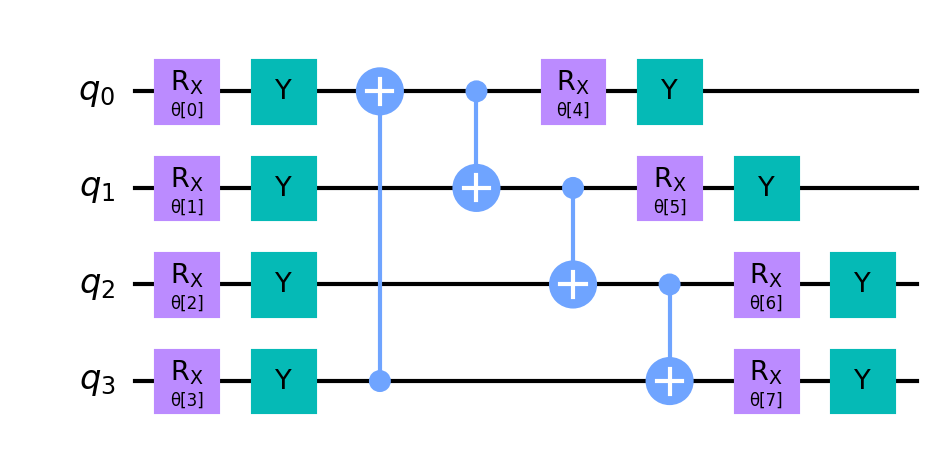

In [3]:
Image(filename='./SU2_Ansatz.png', width=400)

In [112]:
from qiskit.circuit.library import EfficientSU2
from qiskit import QuantumCircuit
from math import pi

In [113]:
SU2ansatz = QuantumCircuit(4)
SU2ansatz.rx(pi,0)
SU2ansatz.rx(pi,1)
SU2ansatz.rx(pi,2)
SU2ansatz.rx(pi,3)
SU2ansatz.y(0)
SU2ansatz.y(1)
SU2ansatz.y(2)
SU2ansatz.y(3)
SU2ansatz.cx(3,0)
SU2ansatz.cx(0,1)
SU2ansatz.rx(pi,0)
SU2ansatz.y(0)
SU2ansatz.cx(1,2)
SU2ansatz.rx(pi,1)
SU2ansatz.cx(2,3)
SU2ansatz.y(1)
SU2ansatz.rx(pi,2)
SU2ansatz.rx(pi,3)
SU2ansatz.y(2)
SU2ansatz.y(3)
SU2ansatz.draw('mpl')

2. Utiliser ce HEA (que l'on nommera `SU2ansatz`) dans l'algorithme VQE, définit ci-dessous par la fonction `algorithm(problem, mapper, optimizer)`, pour calculer l'état fondamental de la molécule $H_2$.

In [103]:
from qiskit.primitives import Estimator
from qiskit.algorithms.minimum_eigensolvers import VQE
from qiskit_nature.second_q.algorithms import GroundStateEigensolver

import numpy as np

def algorithm(problem, mapper, optimizer):
    """ Setup VQE solver algorithm

    Args:
        problem : Electronic Structure Problem
        mapper : qubit mapper 
        optimizer : optimizer

    Returns: vqe solver algorithm
    """    
    
    #ansatz
    ansatz = SU2ansatz # previously constructed
    
    #VQE algorithm solver
    vqe_solver = VQE(Estimator(), ansatz, optimizer)
    vqe_solver.initial_point = np.zeros(ansatz.num_parameters)
 
    # Ground state computation using a minimum eigensolver
    algorithm = GroundStateEigensolver(mapper, vqe_solver)
       
    # Compute Ground State properties.
    algorithm = algorithm.solve(problem)
    
    return algorithm

In [104]:
from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_nature.second_q.transformers import FreezeCoreTransformer

H2_driver = PySCFDriver(
    atom='H .0 .0 -0.3625; H .0 .0 0.3625',
    basis="sto3g",
    charge=0,
    spin=0,
    unit=DistanceUnit.ANGSTROM,
)
# Electronic structure problem
H2_problem = H2_driver.run()
transformer = FreezeCoreTransformer()
H2_problem = transformer.transform(H2_problem)

In [118]:
from qiskit_nature.second_q.mappers import JordanWignerMapper
from qiskit_nature.second_q.mappers import TaperedQubitMapper
from qiskit.algorithms.optimizers import SLSQP

def run_vqe(problem, solver, mapper, optimizer = "SLSQP", show=True):
    """Computing of the molecular ground state with the `GroundStateEigensolver`
class 
    Args:
        problem :  Electronic structure problem

        mapper : Mapper string that can be "PM" or "JWM" or "BKM"
        
        optimizer :  Optimizer string that can be either "SPSA" or "SLSQP" or "L_BFGS_B"

        solver :  Sting that can be either "NumPy" or "VQE"
       
    Returns:
          The ground state of the molecule

    """    
    # Mapper
    dmap = {"JWM": JordanWignerMapper()}
    for k, v in dmap.items():
        if k == mapper:        
            mapp = v   
            
    if solver == "VQE":             
        # Optimizer
        dopt = {"SLSQP": SLSQP()}
        for n, m in dopt.items():
            if n == optimizer:        
                opt = m
        GS_solver = algorithm(problem, mapp, opt)

    # Solver
    if solver == "Numpy":
        GS_solver = NumPyMinimumEigensolver()

    # Ground state computation using a minimum eigensolver. Returns the solver.
    algorithm = GroundStateEigensolver(mapp, vqe_solver) 
    
    # Leveraging Qiskit Runtime
    start = time.time()
    
    # Compute Ground State properties.
    algorithm = algorithm.solve(problem)
    elapsed = str(datetime.timedelta(seconds = time.time()- start))
    
    if show:
        print(f'Running {solver} and {mapper} mapper')
        if solver == "VQE":
            print(f'With {optimizer} optimizer and UCCSD ansatz')
        print(f'Elapsed time: {elapsed} \n')

        print(algorithm.total_energies[0])

    if solver == "VQE":
        return algorithm, elapsed, mapper, solver, optimizer
    else:
        return algorithm, elapsed, mapper, solver

In [119]:
res_vqe = run_vqe(H2_problem, mapper="JWM", optimizer="SLSQP", solver="VQE")

UnboundLocalError: local variable 'algorithm' referenced before assignment